## Import

In [1]:
#custom
from ExploratoryDataAnalyzer import ExploratoryDataAnalyzer
from Standardizer import Standardize

#pandas
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (27, 5)
import seaborn as sns

## Load

In [2]:
dfraw = pd.read_csv(r'C:\Users\Steven Buri\OneDrive\Z_MyResources\Python\Kaggle\Titanic Predicting Survival\train.csv')
dfraw.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C


## Preprocess

In [3]:
class Preprocess:

    def __init__(self, df):
        self.df = df

        #columns
        self.colage = 'Age'
        self.colpassengerid = 'PassengerID'

    def standardize_survival(self):

        conversion_dict = {
            'died': ['0'],
            'survived': ['1'],
        }
        standardize = Standardize(df=self.df, print_conversions=False)
        standardize.standardize_column_values(conversion_dict=conversion_dict, current_col='Survived', revised_col='Survived_')
        self.df = standardize.df

    def bin_age(self):
        self.df['age_binned'] = pd.qcut(dfraw.Age.astype(float), q=10)

    def run_pipeline(self):
        self.standardize_survival()
        self.bin_age()
        return self.df.head()

preprocess = Preprocess(df=dfraw)
preprocess.run_pipeline()
df_preprocessed = preprocess.df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_,age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,died,"(19.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,survived,"(36.0, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,NaN,S,survived,"(25.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,survived,"(31.8, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S,died,"(31.8, 36.0]"


## Explore

In [26]:
import sys
locate_python = sys.exec_prefix

print(locate_python)

c:\Users\Steven Buri\OneDrive\Z_MyResources\Python\Learning\Data Science Bootcamp\CommonEnv


In [25]:
import sys
sys.path

['c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Kaggle\\Titanic Predicting Survival',
 'C:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Classes\\Generators',
 'C:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Classes',
 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Kaggle\\Titanic Predicting Survival',
 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip',
 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39\\DLLs',
 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39\\lib',
 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39',
 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Learning\\Data Science Bootcamp\\CommonEnv',
 '',
 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Learning\\Data Science Bootcamp\\CommonEnv\\lib\\site-packages',
 'C:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\CustomEnv',
 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyRes

In [23]:
import sys
print(sys.path, sep='\n')

['c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Kaggle\\Titanic Predicting Survival', 'C:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Classes\\Generators', 'C:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Classes', 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Kaggle\\Titanic Predicting Survival', 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\Steven Buri\\AppData\\Local\\Programs\\Python\\Python39', 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Learning\\Data Science Bootcamp\\CommonEnv', '', 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\Learning\\Data Science Bootcamp\\CommonEnv\\lib\\site-packages', 'C:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Python\\CustomEnv', 'c:\\Users\\Steven Buri\\OneDrive\\Z_MyResources\\Pyth

In [4]:
explore = ExploratoryDataAnalyzer(df=dfraw, predictors=['Sex', 'Age', 'Fare'], target='Survived')

### Correlations

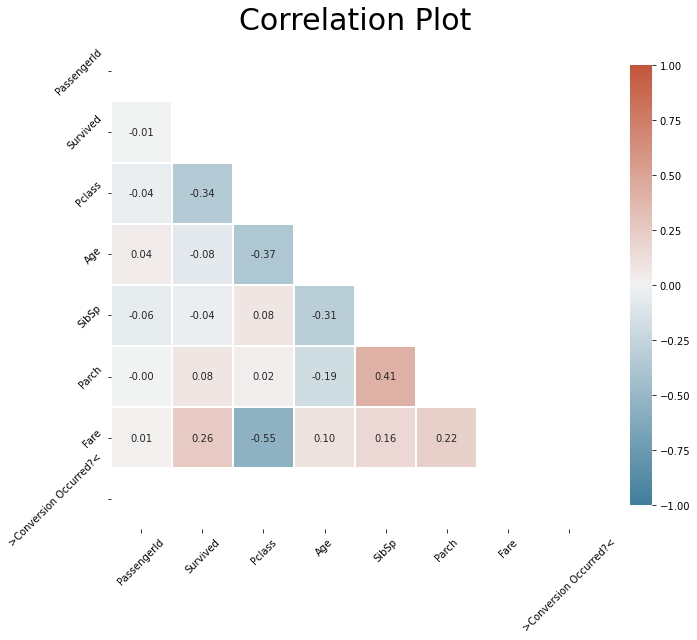

In [5]:
explore.plot_correlation_matrix()

### Blanks

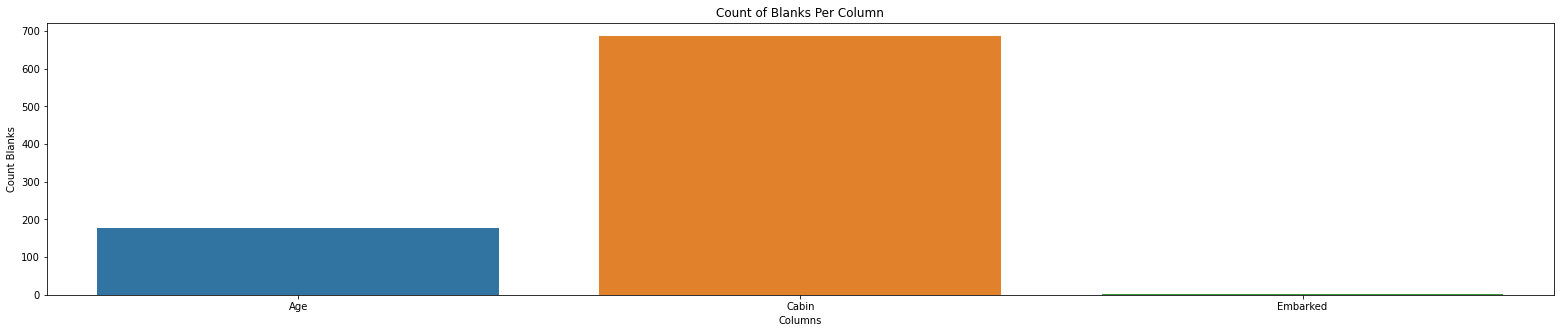

In [6]:
explore.plot_blanks_per_column()


### Target Balance

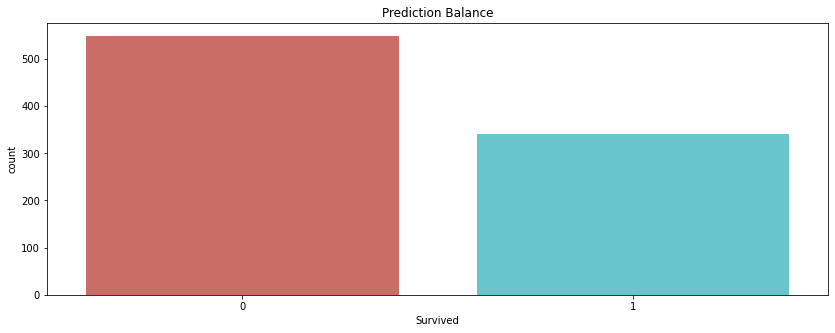

In [7]:
explore.plot_target_balance()

### Grouping Statistics

In [8]:
explore.show_target_grouping_statistics()
eda = dict()
eda['grouping stats'] = 'Age is slightly higher on '

mean stats: 
    PassengerId  Pclass  Age  SibSp  Parch  Fare  >Conversion Occurred?<
0          447       3   31      1      0    22                       1
1          444       2   28      0      0    48                       1 

median stats: 
    PassengerId  Pclass  Age  SibSp  Parch  Fare  >Conversion Occurred?<
0          455       3   28      0      0    10                       1
1          440       2   28      0      0    26                       1 



### Distributions

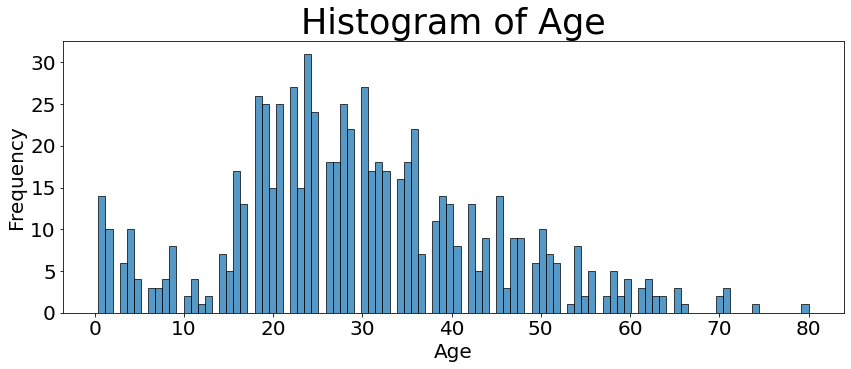

Age Statistics
skew: 0.39
kurtosis: 0.18
mean: 29.7 || median: 28.0 || mode: [24.0]
min: 0.42 || max: 80.0




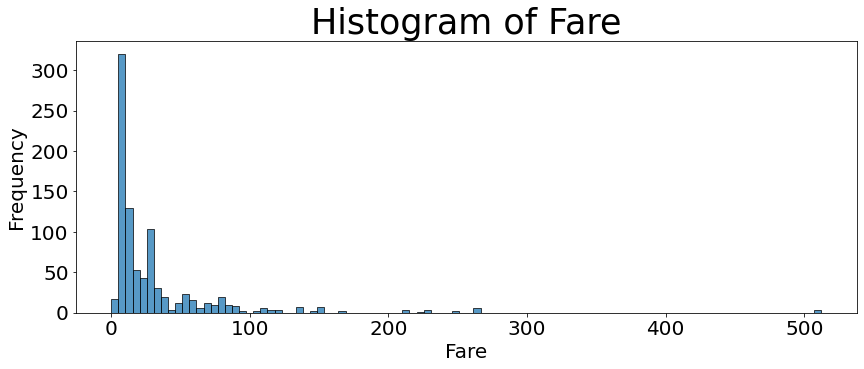

Fare Statistics
skew: 4.79
kurtosis: 33.4
mean: 32.2 || median: 14.5 || mode: [8.0]
min: 0.0 || max: 512.33




In [9]:
explore.plot_distribution(of_columns=['Age', 'Fare'])

explore.plot_n_lowest_and_highest_category_against_target(category='Age', n=5)

### Show Proportions

In [10]:
dfproportions = explore.show_proportions(col='Age', verbose=False)
dfproportions.head(10)

C:\Users\Steven Buri\OneDrive\Z_MyResources\Python\CustomEnv\ExploratoryDataAnalyzer.py:58: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  self.df.style.set_precision(0)


,Count,Percent,Cumulative %
24,30,4,4
22,27,4,8
18,26,4,12
19,25,4,15
28,25,4,19
30,25,4,22
21,24,3,25
25,23,3,29
36,22,3,32
29,20,3,35


In [11]:
#explore.multi_ecdf(series_to_compute=)

In [12]:
#explore.plot_categorical_outlier_impact_on_target_variable()

### Who Survived

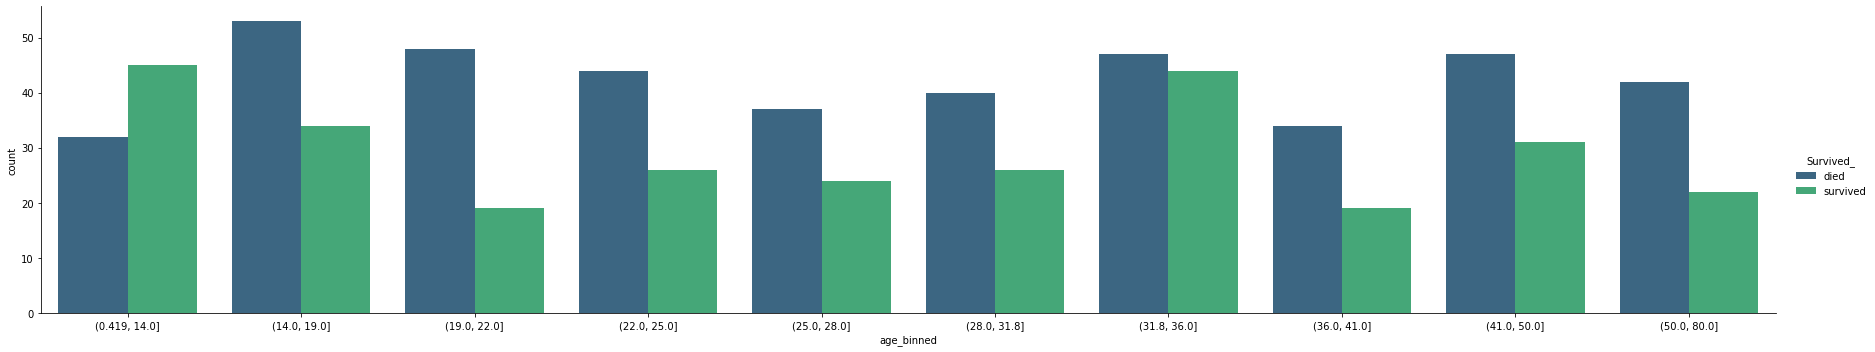

In [13]:
def group_by_age_and_surivival(df):
    #nipy_spectral, prism_r, seismic_r, viridis, winter
    sns.catplot(data=df, x='age_binned', hue='Survived_', palette='viridis', kind='count', height=5, aspect=5)
    plt.show()
    print()
group_by_age_and_surivival(df_preprocessed)

### Additional

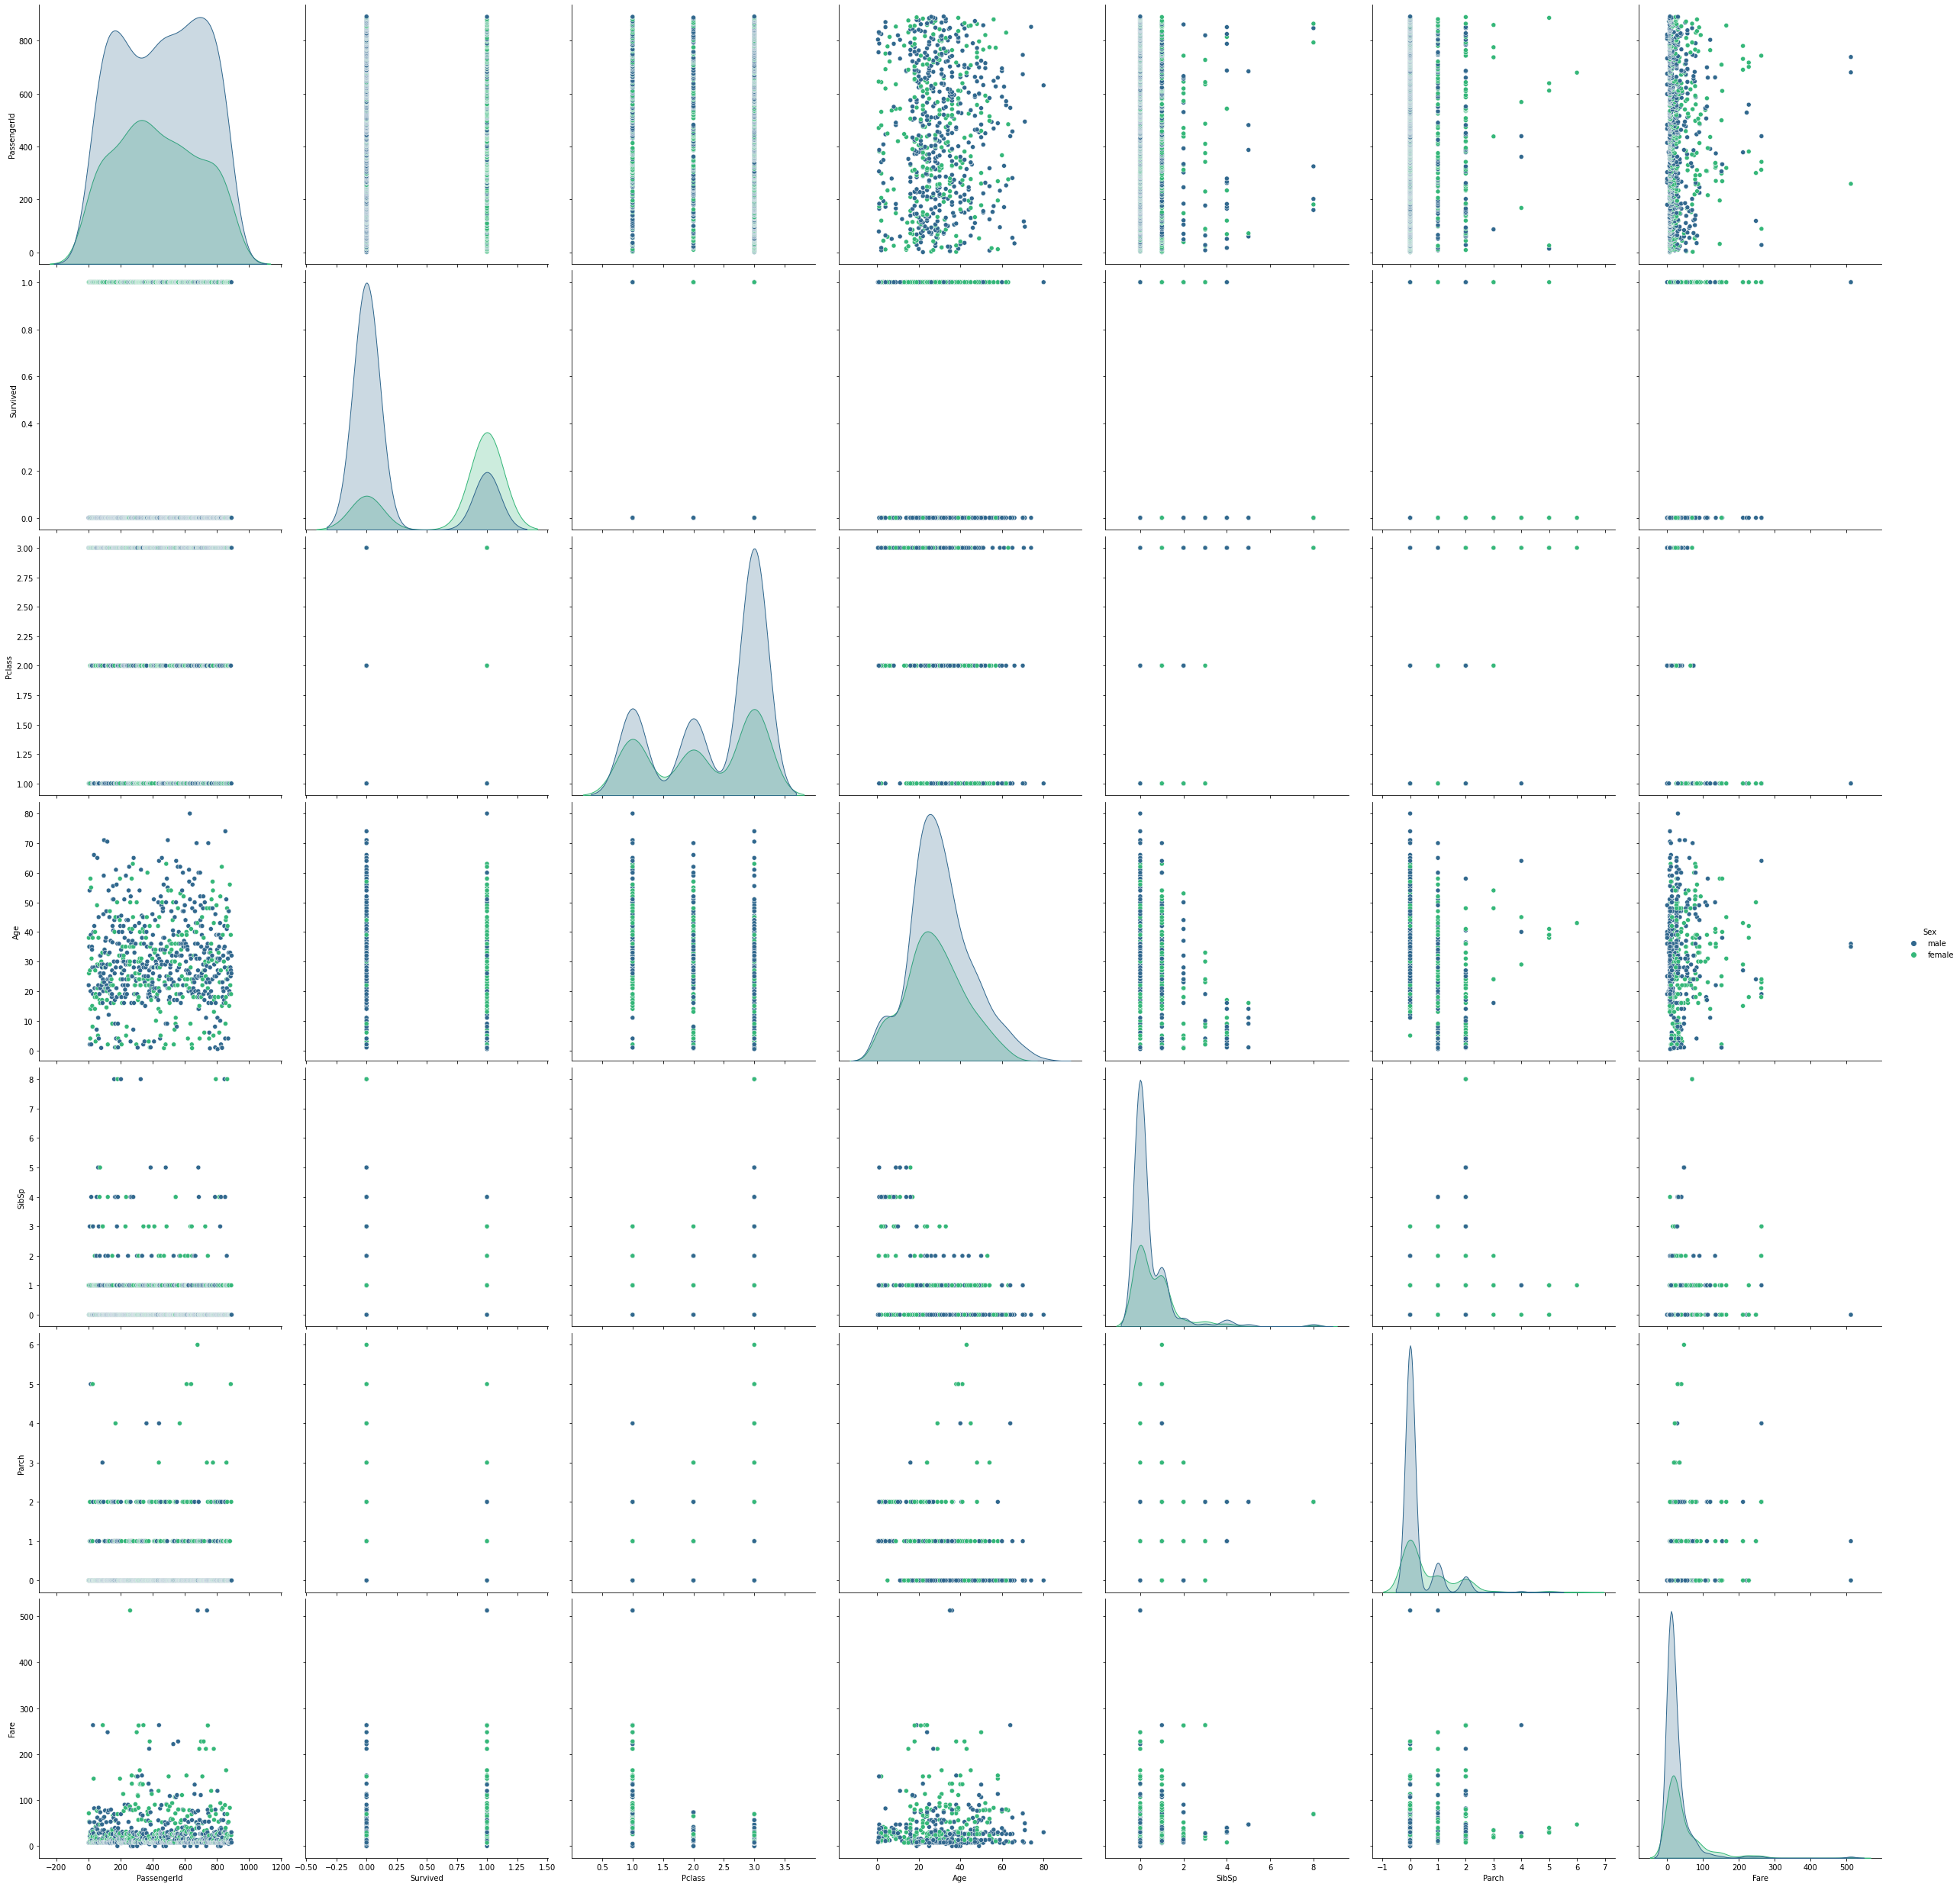

In [21]:
sns.pairplot(data=df_preprocessed, hue='Sex', palette='viridis', height=5, aspect=1)
plt.show()

## Preprocess Data